In [1]:
# importing the data from csv file to dataframe and stored in amazon variable 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
amazon = pd.read_csv('/Users/inderpalsura/Desktop/Lighthouse/capstone_project/data/clean_data.csv', low_memory=False)
amazon.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,111372787.0,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,111372787.0,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,111372787.0,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,111372787.0,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,111372787.0,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Select numerical columns and handle missing values
numeric_columns = ['reviews.numHelpful'] 
data = amazon[numeric_columns].fillna(0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, amazon['reviews.rating'], test_size=0.2, random_state=0)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.5471561082296992


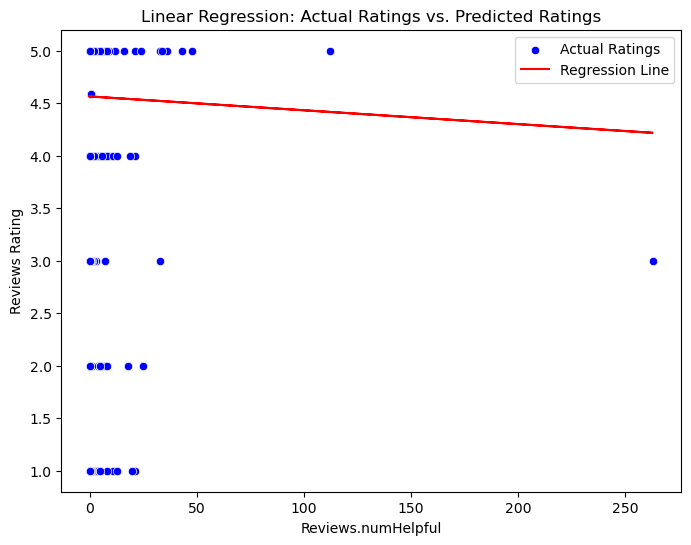

In [4]:
from sklearn.linear_model import LinearRegression

# Assuming you have already prepared your dataset and model as shown in the previous example

# Create a scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test['reviews.numHelpful'], y=y_test, color='blue', label='Actual Ratings')

# Add the regression line
regression_line = LinearRegression()
regression_line.fit(X_train, y_train)
y_pred = regression_line.predict(X_test)
plt.plot(X_test, y_pred, color='red', label='Regression Line')

# Customize the plot
plt.xlabel('Reviews.numHelpful')
plt.ylabel('Reviews Rating')
plt.title('Linear Regression: Actual Ratings vs. Predicted Ratings')
plt.legend()

# Display the plot
plt.show()


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Select relevant features and target variable
selected_features = ['reviews.numHelpful']  # Add more features if needed
target_variable = 'reviews.rating'

# Create a DataFrame with selected features
X = amazon[selected_features]

# Handle missing values (e.g., fill with mean)
X = X.fillna(X.mean())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, amazon[target_variable], test_size=0.2, random_state=0)

# Standardize the data (mean=0, std=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R-squared: {r2:.4f}")


Mean Squared Error: 0.5472
Mean Absolute Error: 0.5809
R-squared: 0.0007


# Analysis:

The MSE and MAE values are relatively low, which might suggest reasonable predictive accuracy, but it's essential to interpret these values within the context of your specific problem. Whether these values are acceptable depends on the rating scale and the importance of prediction accuracy for your application.

The very low R2 value (close to zero) indicates that the model does not explain much of the variance in the ratings. This suggests that the linear relationship between 'reviews.numHelpful' and 'reviews.rating' is very weak or nonlinear, and there are likely other factors influencing ratings that the model does not capture.

# Modelling Techniques:
- Linear regression is a simple and straightforward modeling technique that assumes a linear relationship between independent and dependent variables. However, many real-world problems involve complex, nonlinear relationships.
- Consider exploring more advanced modeling techniques, such as:
    - Decision trees and random forests: These can handle nonlinear and interaction effects in the data.

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Select relevant features (independent variables) and target variable
features = ['reviews.numHelpful'] 
target = 'reviews.rating'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(amazon[features], amazon[target], test_size=0.2, random_state=0)

# Create a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=0)

# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions
predictions = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse:.4f}")


Mean Squared Error: 0.5435


In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Select relevant features (independent variables) and target variable
features = ['reviews.numHelpful']
target = 'categories'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(amazon[features], amazon[target], test_size=0.2, random_state=0)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions
predictions = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.4072


In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

data = amazon

# Create sentiment labels based on ratings
def map_rating_to_sentiment(rating):
    if rating >= 4:
        return "positive"
    elif rating == 3:
        return "neutral"
    else:
        return "negative"

data['sentiment'] = data['reviews.rating'].apply(map_rating_to_sentiment)

# Split the data into training and testing sets
X = data['reviews.text']
y = data['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Choose a machine learning algorithm (e.g., Naive Bayes)
clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)

# Predict sentiments
y_pred = clf.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred, zero_division=1))




Accuracy: 0.9290322580645162
              precision    recall  f1-score   support

    negative       1.00      0.00      0.00       133
     neutral       1.00      0.00      0.00       263
    positive       0.93      1.00      0.96      5184

    accuracy                           0.93      5580
   macro avg       0.98      0.33      0.32      5580
weighted avg       0.93      0.93      0.89      5580

